In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

/Users/elizabethrogers/Desktop/powersystemspublichealth


In [67]:
import os

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn.objects as so



# Create a list of the New England state FIPS codes
# ne_fips = ['09', '23', '25', '33', '44', '50']

In [68]:
# List of New England state FIPS codes
state_abbrv_to_FIPS = {
    "CT": "09",
    "ME": "23",
    "MA": "25",
    "NH": "33",
    "RI": "44",
    "VT": "50",
    "NY": "36"
}

NE_state_abbrv_to_state = {
    'CT': 'Connecticut',
    'ME': 'Maine',
    'MA': 'Massachusetts',
    'NH': 'New Hampshire',
    'RI': 'Rhode Island',
    'VT': 'Vermont',
    'NY': 'New York'
}

NE_state_to_state_abbrv = {v: k for k, v in NE_state_abbrv_to_state.items()}

equity_data_dir = 'equitydatasets'
NE_outcomes_dir = 'NewEnglandSpecificOutcomesUPDATED'
dataprocessing_dir = 'dataprocessing'

# data sets
population = pd.read_csv(os.path.join(equity_data_dir, "PopulationEstimates.csv"))
poverty = pd.read_csv(os.path.join(equity_data_dir, "Poverty2023.csv"))
# includes income data, from USDA
unemployment = pd.read_csv(os.path.join(equity_data_dir, "UnemploymentAndIncome2023.csv"))
#ACS income data that chris sent in the discord
income_complete = pd.read_csv(os.path.join(equity_data_dir, "ACSPopulation.csv"),
    skiprows=(1))

pop_complete = pd.read_csv(os.path.join(equity_data_dir, "ACSDP5Y2021.DP05-Data.csv"),
    skiprows=(1)) 


# cobra outcomes
highhealth = pd.read_csv(
    os.path.join(NE_outcomes_dir, "Fall116HighHealthBoundGenerarOutcome.csv"),
    skiprows=(1,3110))
lowhealth = pd.read_csv(
    os.path.join(NE_outcomes_dir, "Fall116LowHealthBoundGeneratorOutcome.csv"),
    skiprows=(1,3110))

carbon = pd.read_csv(
    os.path.join(NE_outcomes_dir, "Fall116CarbonEmiGeneratorOutcome.csv"),
    skiprows=(1,3110))
mixhigh = pd.read_csv(
    os.path.join(NE_outcomes_dir, "Fall116mixhighGeneratorOutcome.csv"),
    skiprows=(1,3110))
mixlow = pd.read_csv(
    os.path.join(NE_outcomes_dir, "Fall116mixlowGeneratorOutcome.csv"),
    skiprows=(1,3110))
original = pd.read_csv(os.path.join(NE_outcomes_dir, "Fall116originalGeneratorOutcome.csv"),
    skiprows=(1,3110))

In [48]:
income_complete
NE_state_to_state_abbrv

{'Connecticut': 'CT',
 'Maine': 'ME',
 'Massachusetts': 'MA',
 'New Hampshire': 'NH',
 'Rhode Island': 'RI',
 'Vermont': 'VT',
 'New York': 'NY'}

## High Health (Total Health Benefits - high estimate)

In [22]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(highhealth.dtypes)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(pop_complete.dtypes)

Geography                                                                                                                                                                           object
Geographic Area Name                                                                                                                                                                object
Estimate!!SEX AND AGE!!Total population                                                                                                                                              int64
Margin of Error!!SEX AND AGE!!Total population                                                                                                                                      object
Estimate!!SEX AND AGE!!Total population!!Male                                                                                                                                        int64
Margin of Error!!SEX AND AGE!!Total population!!Male             

In [23]:
NE_states = [
    'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York'
]
NE_highhealth = highhealth.loc[
    highhealth['State'].isin(NE_state_abbrv_to_state.values()),
    ['State', 'County', '$ Total Health Benefits(high estimate)',
     '$ Total Health Benefits(low estimate)']
]
NE_highhealth = NE_highhealth.rename(columns={
    '$ Total Health Benefits(high estimate)': 'Health Benefits High Estimate (high)',
    '$ Total Health Benefits(low estimate)': 'Health Benefits High Estimate (low)',
})

NE_highhealth['State'] = NE_highhealth['State'].map(lambda x: NE_state_to_state_abbrv[x])

NE_highhealth = NE_highhealth.set_index(['State', 'County']).sort_index()

In [9]:
NE_highhealth

Health Benefits High Estimate (high)  \
State County                                             
CT    Fairfield                          -26704.405666   
      Hartford                           -55237.611419   
      Litchfield                          -8534.112687   
      Middlesex                          -15803.044555   
      New Haven                          -44940.203988   
...                                                ...   
VT    Orleans                              -675.457598   
      Rutland                             -1928.857252   
      Washington                          -1168.251559   
      Windham                             -2113.699356   
      Windsor                             -2315.152327   

                  Health Benefits High Estimate (low)  
State County                                           
CT    Fairfield                         -19237.634028  
      Hartford                          -41210.822892  
      Litchfield                         -6165.341489  
      Middlesex                         -12183.068227  
      New Haven                         -33096.672098  
...                                               ...  
VT    Orleans                             -481.790983  
      Rutland                            -1428.885318  
      Washington                          -832.499510  
      Windham                            -1582.123477  
      Windsor                            -1731.414857  

[129 rows x 2 columns]

## Low Health (Total Health Benefits - high estimate)

In [24]:

NE_lowhealth = lowhealth.loc[
    lowhealth['State'].isin(NE_state_abbrv_to_state.values()),
    ['State', 'County', '$ Total Health Benefits(high estimate)',
     '$ Total Health Benefits(low estimate)']
]
NE_lowhealth = NE_lowhealth.rename(columns={
    '$ Total Health Benefits(high estimate)': 'Health Benefits Low Estimate (high)',
    '$ Total Health Benefits(low estimate)': 'Health Benefits Low Estimate (low)',
})

NE_lowhealth['State'] = NE_lowhealth['State'].map(lambda x: NE_state_to_state_abbrv[x])

NE_lowhealth = NE_lowhealth.set_index(['State', 'County']).sort_index()

In [11]:
NE_lowhealth

Health Benefits Low Estimate (high)  \
State County                                            
CT    Fairfield                         -26704.405666   
      Hartford                          -55237.611419   
      Litchfield                         -8534.112687   
      Middlesex                         -15803.044555   
      New Haven                         -44940.203988   
...                                               ...   
VT    Orleans                             -675.457598   
      Rutland                            -1928.857252   
      Washington                         -1168.251559   
      Windham                            -2113.699356   
      Windsor                            -2315.152327   

                  Health Benefits Low Estimate (low)  
State County                                          
CT    Fairfield                        -19237.634028  
      Hartford                         -41210.822892  
      Litchfield                        -6165.341489  
      Middlesex                        -12183.068227  
      New Haven                        -33096.672098  
...                                              ...  
VT    Orleans                            -481.790983  
      Rutland                           -1428.885318  
      Washington                         -832.499510  
      Windham                           -1582.123477  
      Windsor                           -1731.414857  

[129 rows x 2 columns]

## Carbon Emissions

In [25]:
NE_states = [
    'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York'
]

NE_carbon = carbon.loc[
    carbon['State'].isin(NE_state_abbrv_to_state.values()),
    ['State', 'County', '$ Total Health Benefits(high estimate)',
     '$ Total Health Benefits(low estimate)']
]
NE_carbon= NE_carbon.rename(columns={
    '$ Total Health Benefits(high estimate)': 'Health Benefits Carbon (high)',
    '$ Total Health Benefits(low estimate)': 'Health Benefits Carbon (low)',
})

NE_carbon['State'] = NE_carbon['State'].map(lambda x: NE_state_to_state_abbrv[x])

NE_carbon = NE_carbon.set_index(['State', 'County']).sort_index()

In [32]:
NE_carbon

Health Benefits Carbon (high)  Health Benefits Carbon (low)
State County                                                                 
CT    Fairfield                       -0.003109                     -0.001507
      Hartford                         0.016555                      0.007965
      Litchfield                       0.001718                      0.000857
      Middlesex                        0.000602                      0.000266
      New Haven                       -0.001085                     -0.000624
...                                         ...                           ...
VT    Orleans                         -0.000337                     -0.000165
      Rutland                          0.001299                      0.000659
      Washington                       0.000325                      0.000166
      Windham                          0.001273                      0.000621
      Windsor                          0.001263                      0.000653

[129 rows x 2 columns]

## Mix High

In [26]:
NE_states = [
    'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York'
]

NE_mixhigh = mixhigh.loc[
    mixhigh['State'].isin(NE_state_abbrv_to_state.values()),
    ['State', 'County', '$ Total Health Benefits(high estimate)',
     '$ Total Health Benefits(low estimate)']
]
NE_mixhigh= NE_mixhigh.rename(columns={
    '$ Total Health Benefits(high estimate)': 'Health Benefits Combination Upper Bound (high)',
    '$ Total Health Benefits(low estimate)': 'Health Benefits Combination Upper Bound (low)',
})

NE_mixhigh['State'] = NE_mixhigh['State'].map(lambda x: NE_state_to_state_abbrv[x])

NE_mixhigh = NE_mixhigh.set_index(['State', 'County']).sort_index()

## Mix Low

In [27]:
NE_states = [
    'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York'
]

NE_mixlow = mixlow.loc[
    mixlow['State'].isin(NE_state_abbrv_to_state.values()),
    ['State', 'County', '$ Total Health Benefits(high estimate)',
     '$ Total Health Benefits(low estimate)']
]
NE_mixlow= NE_mixlow.rename(columns={
    '$ Total Health Benefits(high estimate)': 'Health Benefits Combination Lower Bound (high)',
    '$ Total Health Benefits(low estimate)': 'Health Benefits Combination Lower Bound (low)',
})

NE_mixlow['State'] = NE_mixlow['State'].map(lambda x: NE_state_to_state_abbrv[x])

NE_mixlow = NE_mixlow.set_index(['State', 'County']).sort_index()

## Original Cost Optimization

In [28]:
NE_states = [
    'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York'
]

NE_original = original.loc[
    original['State'].isin(NE_state_abbrv_to_state.values()),
    ['State', 'County', '$ Total Health Benefits(high estimate)',
     '$ Total Health Benefits(low estimate)']
]
NE_original= NE_original.rename(columns={
    '$ Total Health Benefits(high estimate)': 'Health Benefits of Cost Optimizaiton (high)',
    '$ Total Health Benefits(low estimate)': 'Health Benefits of Cost Optimization (low)',
})

NE_original['State'] = NE_original['State'].map(lambda x: NE_state_to_state_abbrv[x])

NE_original = NE_original.set_index(['State', 'County']).sort_index()

# Population

In [29]:
NE_population_mask = population['State'].isin(NE_state_abbrv_to_state.keys())

NE_population = population.loc[
    NE_population_mask & (population['Attribute'] == 'POP_ESTIMATE_2021'),
    ['State', 'Area_Name', 'Value']
]

NE_population = NE_population.rename(columns={'Area_Name': 'County', 'Value': 'Population'})

NE_population = NE_population.loc[NE_population['County'].str.contains('County')]
NE_population['County'] = NE_population['County'].str.replace(' County', '', regex=False)

assert (NE_population['Population'] % 1.).max() == 0.
NE_population['Population'] = NE_population['Population'].astype(int)
NE_population = NE_population.set_index(['State', 'County']).sort_index()['Population']

In [6]:
NE_population

State  County    
MA     Barnstable    232315
       Berkshire     128376
       Bristol       579756
       Dukes          21127
       Essex         807360
                      ...  
VT     Orleans        27591
       Rutland        60728
       Washington     60033
       Windham        46150
       Windsor        58350
Name: Population, Length: 121, dtype: int64

Redo for dataset with a more complete population count for 2021

In [30]:
# Estimate!!SEX AND AGE!!Total population
# Extract the county and state into new columns
pop_complete[['County', 'State']] = income_complete["Geographic Area Name"].str.split(r', ', expand=True)

# Remove the original column and rearrange the order
pop_complete = pop_complete.drop("Geographic Area Name", axis=1)
pop_complete = pop_complete[['County', 'State', 'Estimate!!SEX AND AGE!!Total population']]

pop_complete

,County,State,Estimate!!SEX AND AGE!!Total population
0,Autauga County,Alabama,58239
1,Baldwin County,Alabama,227131
2,Barbour County,Alabama,25259
3,Bibb County,Alabama,22412
4,Blount County,Alabama,58884
...,...,...,...
3216,Vega Baja Municipio,Puerto Rico,54544
3217,Vieques Municipio,Puerto Rico,8317
3218,Villalba Municipio,Puerto Rico,22341
3219,Yabucoa Municipio,Puerto Rico,31047


In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(pop_complete.dtypes)

County                                     object
State                                      object
Estimate!!SEX AND AGE!!Total population     int64
dtype: object

In [31]:
NE_pop_comp_mask = pop_complete['State'].isin(NE_state_to_state_abbrv.keys())


# stands for income complete - trying to see if this includes more data for areas of interest
NE_pop_comp = pop_complete.loc[
    NE_pop_comp_mask ,
    ['State', 'County', 'Estimate!!SEX AND AGE!!Total population']
]

NE_pop_comp = NE_pop_comp.rename(columns={'Estimate!!SEX AND AGE!!Total population': 'Population'})

# NE_income_comp= NE_income_comp.loc[NE_income_comp['County'].str.contains('County')]
# # NE_income_comp['County'] = NE_income_comp['County'].str.replace(' County, ..', '', regex=True)
NE_pop_comp['County'] = NE_pop_comp['County'].replace(' County', '', regex=True)

# assert (NE_pop_comp['Populaiton'] % 1.).max() == 0.
NE_pop_comp['Population'] = NE_pop_comp['Population'].astype(int)
# NE_pop_comp['County'] = NE_pop_comp['County'].astype(str)
# NE_pop_comp['State'] = NE_pop_comp['State'].astype(str)



NE_pop_comp['State'] = NE_pop_comp['State'].map(lambda x: NE_state_to_state_abbrv[x])
NE_pop_comp = NE_pop_comp.set_index(['State', 'County']).sort_index()['Population']


In [32]:
NE_pop_comp
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(NE_pop_comp.dtypes)

dtype('int64')

# Income

original dataset with multiple data on unimployment + income

In [33]:
NE_income_mask = unemployment['State'].isin(NE_state_abbrv_to_state.keys())

NE_income = unemployment.loc[
    NE_income_mask & (unemployment['Attribute'] == 'Median_Household_Income_2022'),
    ['State', 'Area_Name', 'Value']
]

NE_income

NE_income = NE_income.rename(columns={'Area_Name': 'County', 'Value': 'Income'})

NE_income = NE_income.loc[NE_income['County'].str.contains('County')]
NE_income['County'] = NE_income['County'].str.replace(' County, ..', '', regex=True)

assert (NE_income['Income'] % 1.).max() == 0.
NE_income['Income'] = NE_income['Income'].astype(int)
NE_income = NE_income.set_index(['State', 'County']).sort_index()['Income']

In [10]:
NE_income

State  County    
MA     Barnstable    89774
       Berkshire     71102
       Bristol       80702
       Dukes         89136
       Essex         92118
                     ...  
VT     Orleans       56818
       Rutland       61290
       Washington    77432
       Windham       61976
       Windsor       74244
Name: Income, Length: 121, dtype: int64

Dataset that is hopefully more complete, chris shared in the discord channel

In [34]:
# Extract the county and state into new columns
income_complete[['County', 'State']] = income_complete["Geographic Area Name"].str.split(r', ', expand=True)

# Remove the original column and rearrange the order
income_complete = income_complete.drop("Geographic Area Name", axis=1)
income_complete = income_complete[['County', 'State', 'Estimate!!Households!!Median income (dollars)']]

income_complete

,County,State,Estimate!!Households!!Median income (dollars)
0,Autauga County,Alabama,62660
1,Baldwin County,Alabama,64346
2,Barbour County,Alabama,36422
3,Bibb County,Alabama,54277
4,Blount County,Alabama,52830
...,...,...,...
3216,Vega Baja Municipio,Puerto Rico,21507
3217,Vieques Municipio,Puerto Rico,14942
3218,Villalba Municipio,Puerto Rico,20722
3219,Yabucoa Municipio,Puerto Rico,17267


In [35]:
NE_income_comp_mask = income_complete['State'].isin(NE_state_to_state_abbrv.keys())


# stands for income complete - trying to see if this includes more data for areas of interest
NE_income_comp = income_complete.loc[
    NE_income_comp_mask,
    ['State', 'County', 'Estimate!!Households!!Median income (dollars)']
]

NE_income_comp = NE_income_comp.rename(columns={'Estimate!!Households!!Median income (dollars)': 'Income'})

# NE_income_comp= NE_income_comp.loc[NE_income_comp['County'].str.contains('County')]
# # NE_income_comp['County'] = NE_income_comp['County'].str.replace(' County, ..', '', regex=True)
NE_income_comp['County'] = NE_income_comp['County'].replace(' County', '', regex=True)

# # # assert (NE_income_comp['Income'] % 1.).max() == 0.
NE_income_comp['Income'] = NE_income_comp['Income'].astype(int)



NE_income_comp['State'] = NE_income_comp['State'].map(lambda x: NE_state_to_state_abbrv[x])
NE_income_comp = NE_income_comp.set_index(['State', 'County']).sort_index()['Income']



In [36]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(NE_income_comp.dtypes)
# NE_income_comp

dtype('int64')

# Join

In [36]:
# TODO: use outer first, then check for NaNs
# Fix earlier code until there's no NaNs
# Currently, Connecticut has NaNs in population and income, because it only has 2020 population listed, not 2021
# Notes: St. Lawrence has a period on only some of the data sets
outer = NE_highhealth.join([NE_pop_comp, NE_income_comp, NE_carbon, NE_lowhealth, NE_mixhigh, NE_mixlow, NE_original], how='outer')
outer[outer.isna().any(axis=1)]

,,Health Benefits High Estimate (high),Health Benefits High Estimate (low),Population,Income,Health Benefits Carbon (high),Health Benefits Carbon (low),Health Benefits Low Estimate (high),Health Benefits Low Estimate (low),Health Benefits Combination Upper Bound (high),Health Benefits Combination Upper Bound (low),Health Benefits Combination Lower Bound (high),Health Benefits Combination Lower Bound (low),Health Benefits of Cost Optimizaiton (high),Health Benefits of Cost Optimization (low)
State,County,,,,,,,,,,,,,,


In [94]:
inner = NE_highhealth.join([NE_pop_comp, NE_income_comp, NE_carbon, NE_lowhealth, NE_mixhigh, NE_mixlow, NE_original], how='inner')



In [83]:
inner

Health Benefits High Estimate (high)  \
State County                                             
CT    Fairfield                          -26704.405666   
      Hartford                           -55237.611419   
      Litchfield                          -8534.112687   
      Middlesex                          -15803.044555   
      New Haven                          -44940.203988   
...                                                ...   
VT    Orleans                              -675.457598   
      Rutland                             -1928.857252   
      Washington                          -1168.251559   
      Windham                             -2113.699356   
      Windsor                             -2315.152327   

                  Health Benefits High Estimate (low)  Population  Income  \
State County                                                                
CT    Fairfield                         -19237.634028      956446  101194   
      Hartford                          -41210.822892      898636   80320   
      Litchfield                         -6165.341489      185175   84797   
      Middlesex                         -12183.068227      164568   90833   
      New Haven                         -33096.672098      864751   75043   
...                                               ...         ...     ...   
VT    Orleans                             -481.790983       27317   58037   
      Rutland                            -1428.885318       60662   59751   
      Washington                          -832.499510       59609   70128   
      Windham                            -1582.123477       45811   59195   
      Windsor                            -1731.414857       57593   63787   

                  Health Benefits Carbon (high)  Health Benefits Carbon (low)  \
State County                                                                    
CT    Fairfield                   -27265.444566                 -19590.890075   
      Hartford                    -56321.305752                 -41887.609106   
      Litchfield                   -8745.163181                  -6298.324355   
      Middlesex                   -16016.295805                 -12317.542919   
      New Haven                   -45747.997296                 -33604.565591   
...                                         ...                           ...   
VT    Orleans                       -717.096782                   -508.501357   
      Rutland                      -2046.346101                  -1504.175459   
      Washington                   -1240.515083                   -877.886914   
      Windham                      -2205.917158                  -1637.676295   
      Windsor                      -2462.438398                  -1826.042340   

                  Health Benefits Low Estimate (high)  \
State County                                            
CT    Fairfield                         -26704.405666   
      Hartford                          -55237.611419   
      Litchfield                         -8534.112687   
      Middlesex                         -15803.044555   
      New Haven                         -44940.203988   
...                                               ...   
VT    Orleans                             -675.457598   
      Rutland                            -1928.857252   
      Washington                         -1168.251559   
      Windham                            -2113.699356   
      Windsor                            -2315.152327   

                  Health Benefits Low Estimate (low)  \
State County                                           
CT    Fairfield                        -19237.634028   
      Hartford                         -41210.822892   
      Litchfield                        -6165.341489   
      Middlesex                        -12183.068227   
      New Haven                        -33096.672098   
...                                              ...   
VT    Orleans    

# High Health Benefits upper bound graph

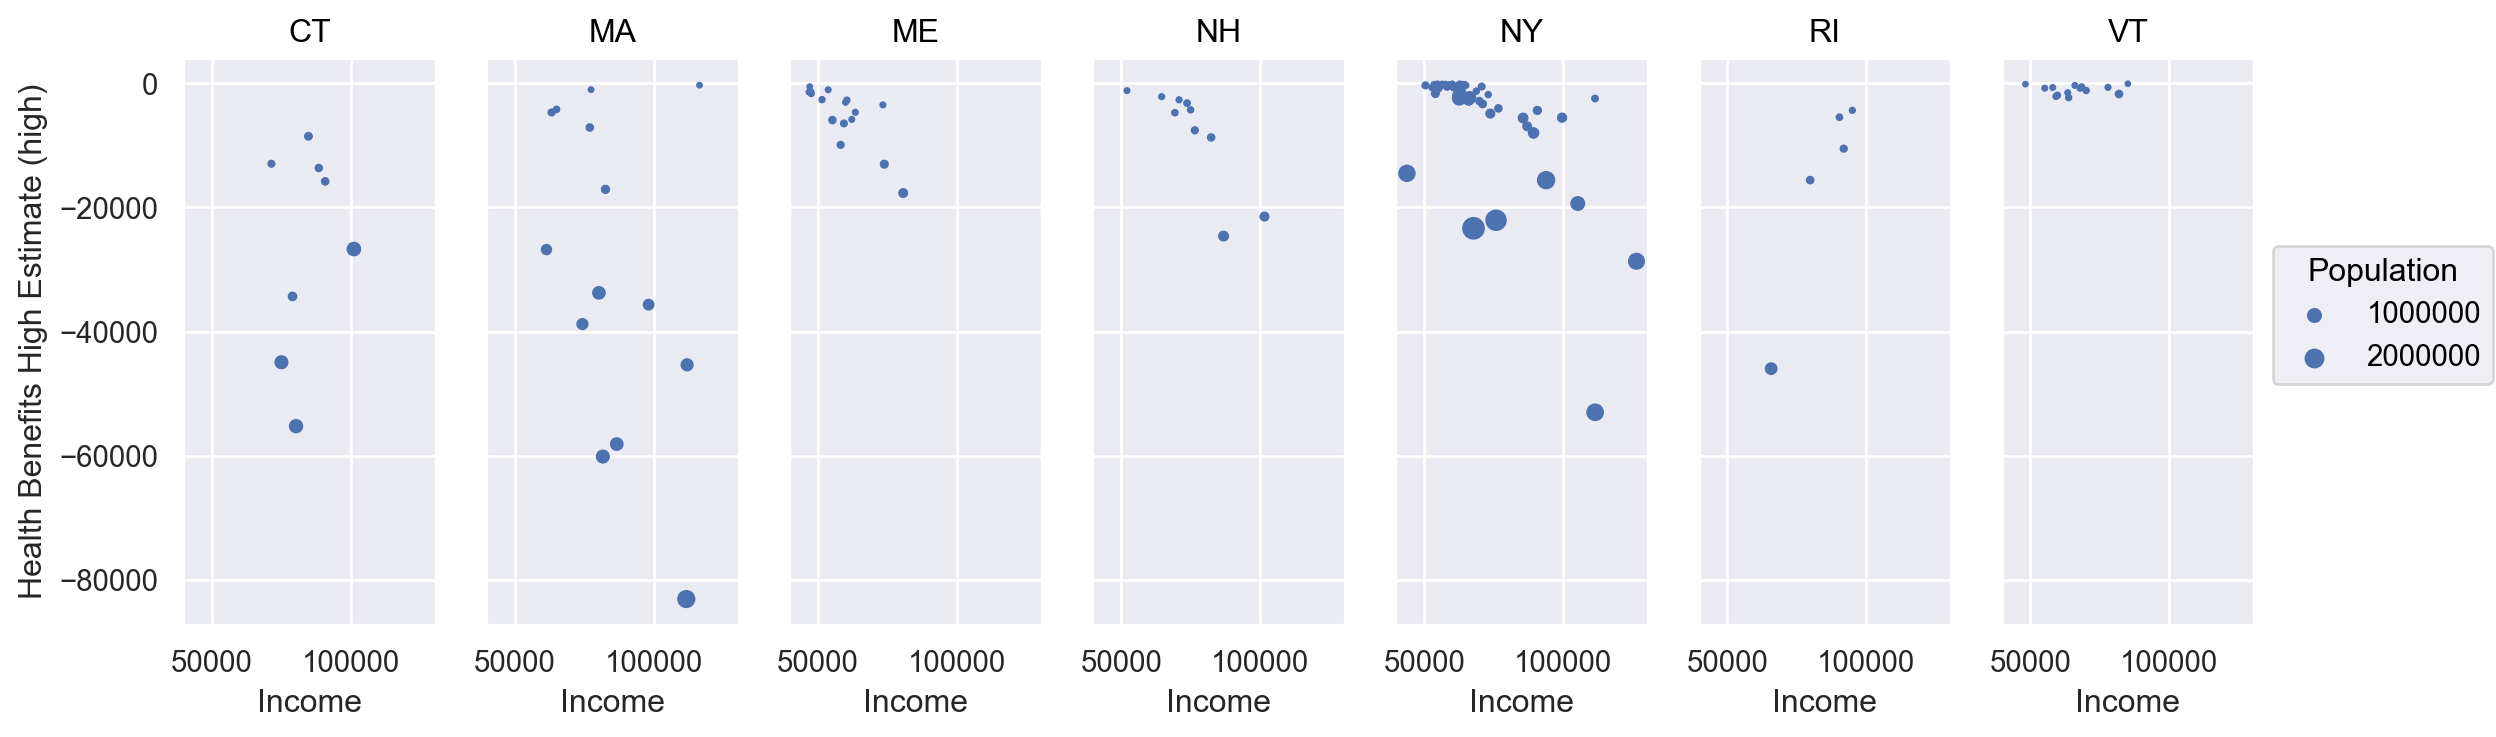

In [84]:

(
    so.Plot(
        inner,
        x='Income',
        y='Health Benefits High Estimate (high)',
        # color='State',
        pointsize='Population')
    .add(so.Dot())
    .facet(col='State')
    .layout(size=(12, 4))
)

# Low Health Benefits upper bound graph

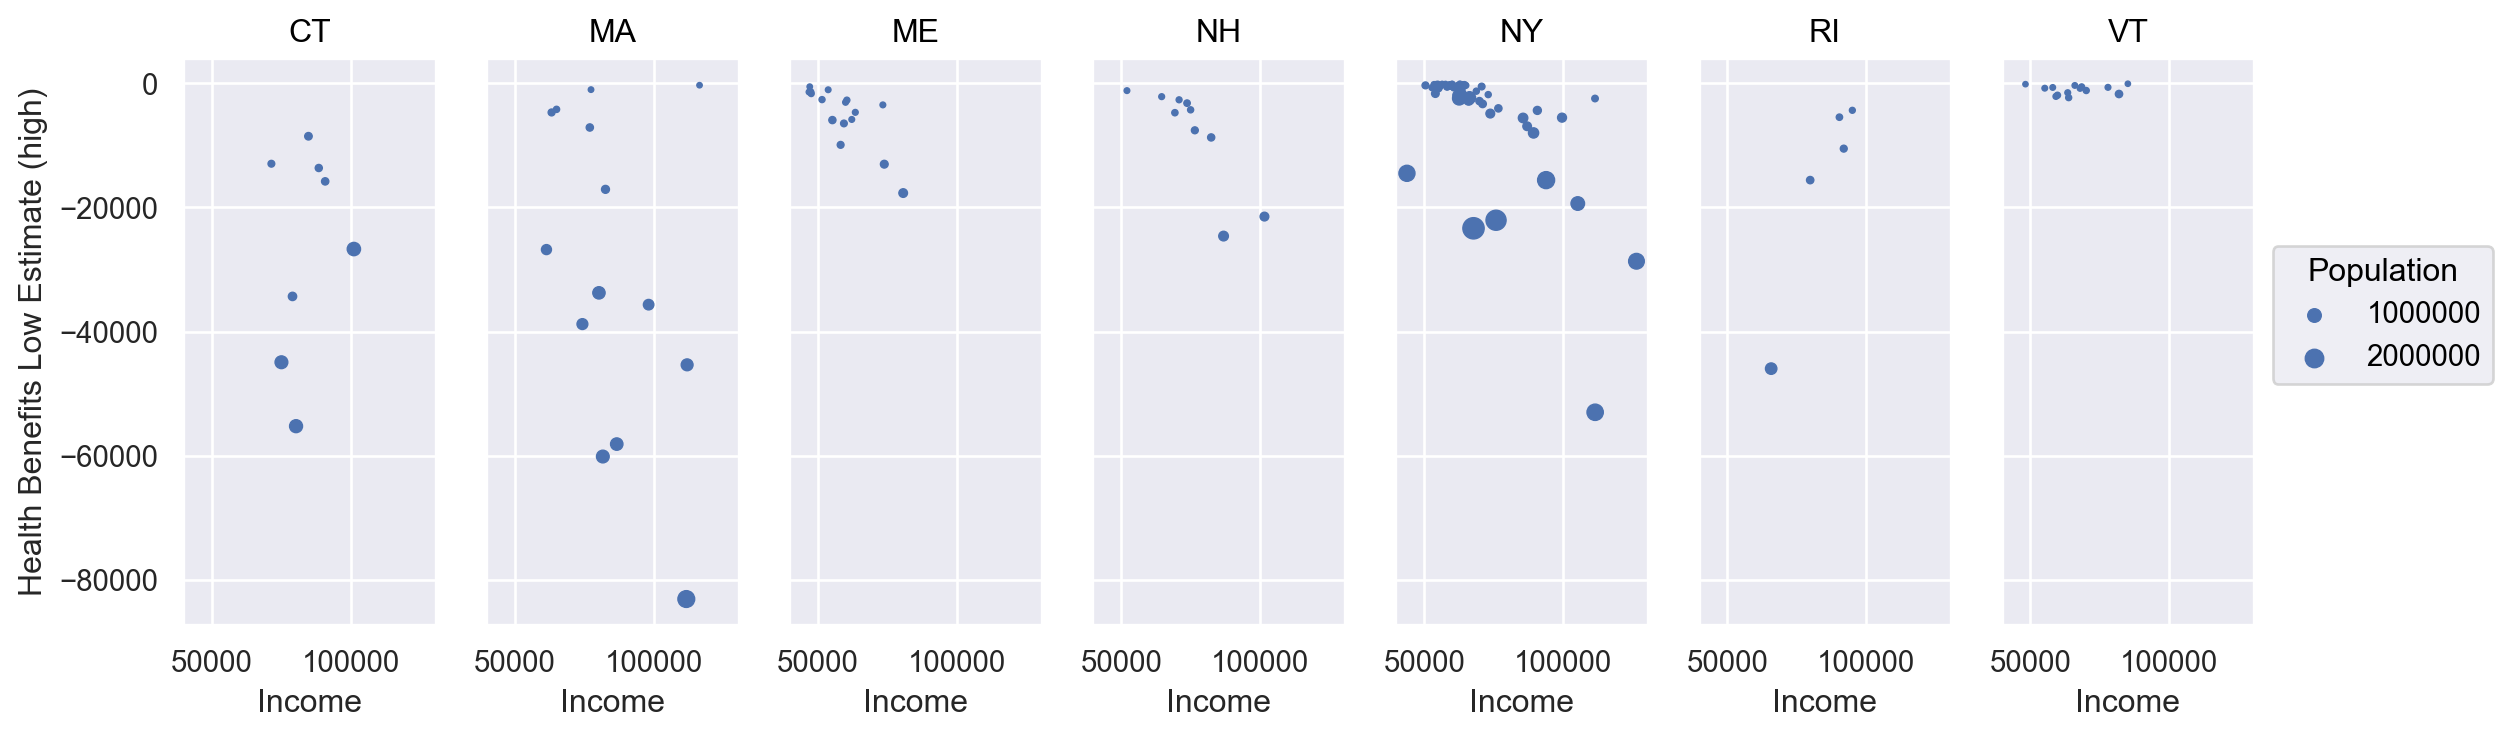

In [41]:

(
    so.Plot(
        inner,
        x='Income',
        y='Health Benefits Low Estimate (high)',
        # color='State',
        pointsize='Population')
    .add(so.Dot())
    .facet(col='State')
    .layout(size=(12, 4))
)

# Health Benefits of Carbon (high)

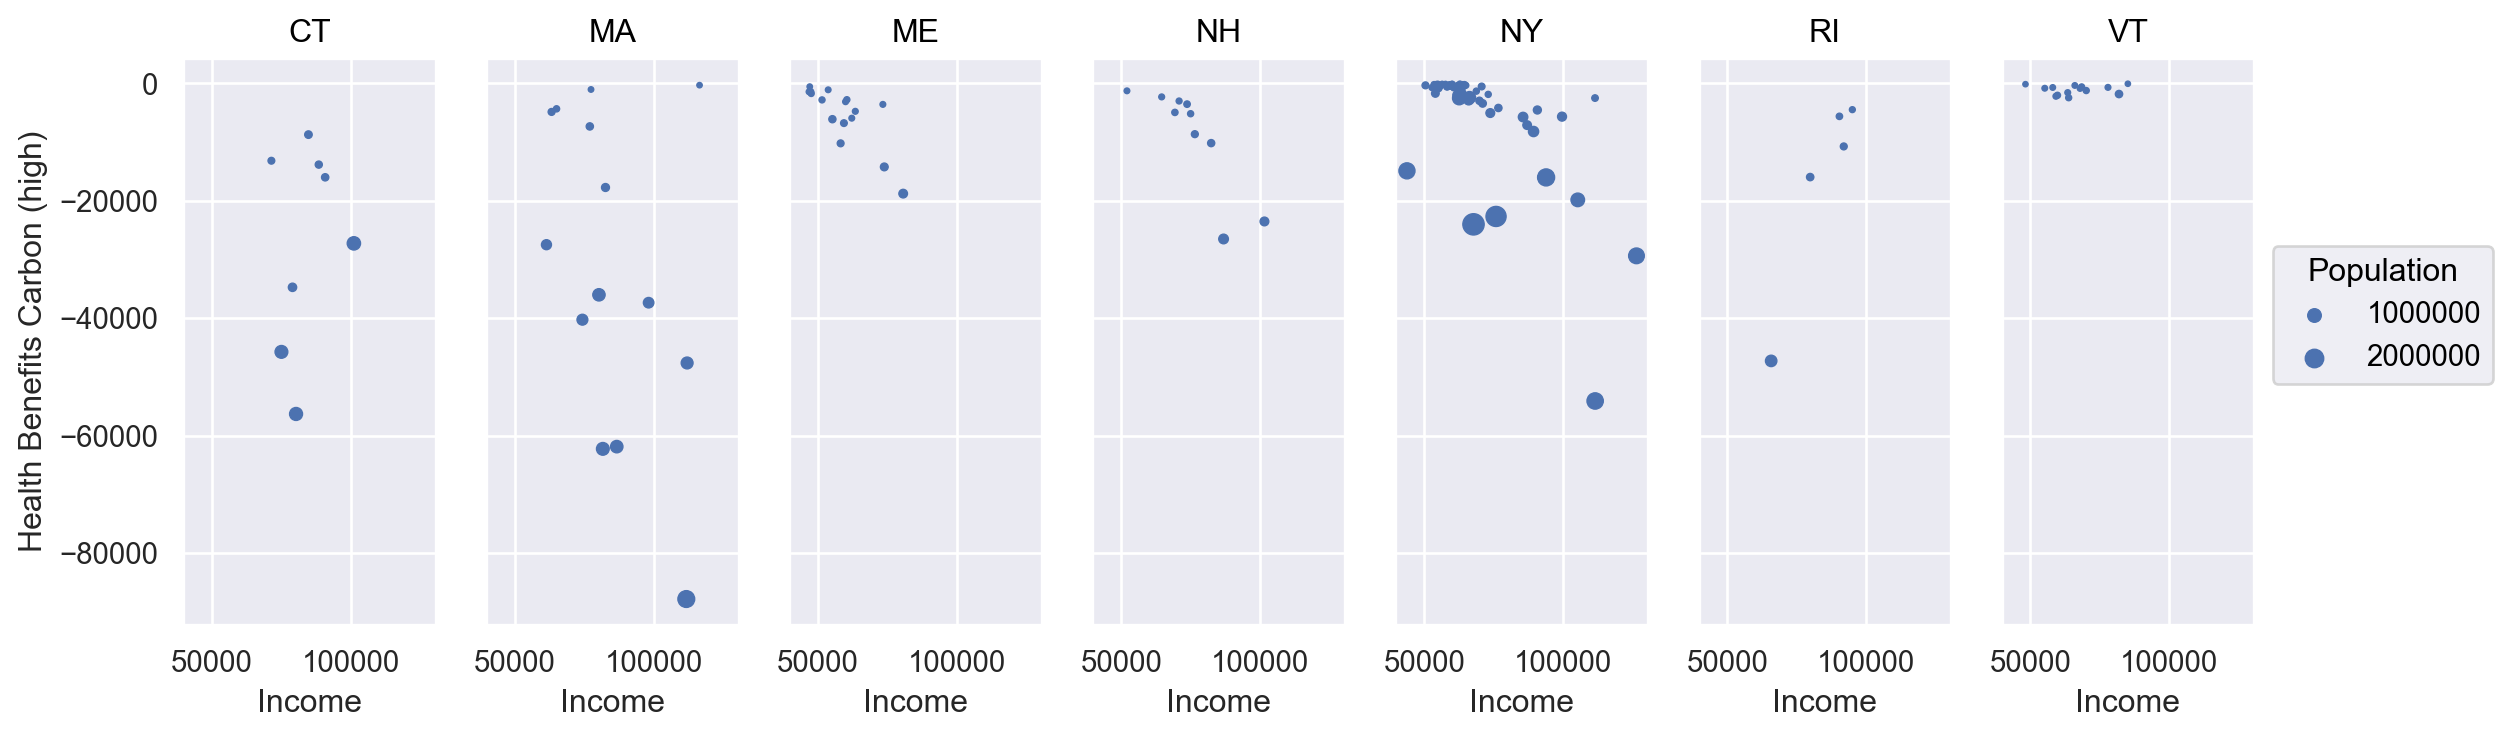

In [44]:

(
    so.Plot(
        inner,
        x='Income',
        y='Health Benefits Carbon (high)',
        # color='State',
        pointsize='Population')
    .add(so.Dot())
    .facet(col='State')
    .layout(size=(12, 4))
)

# Original Optimization health impacts

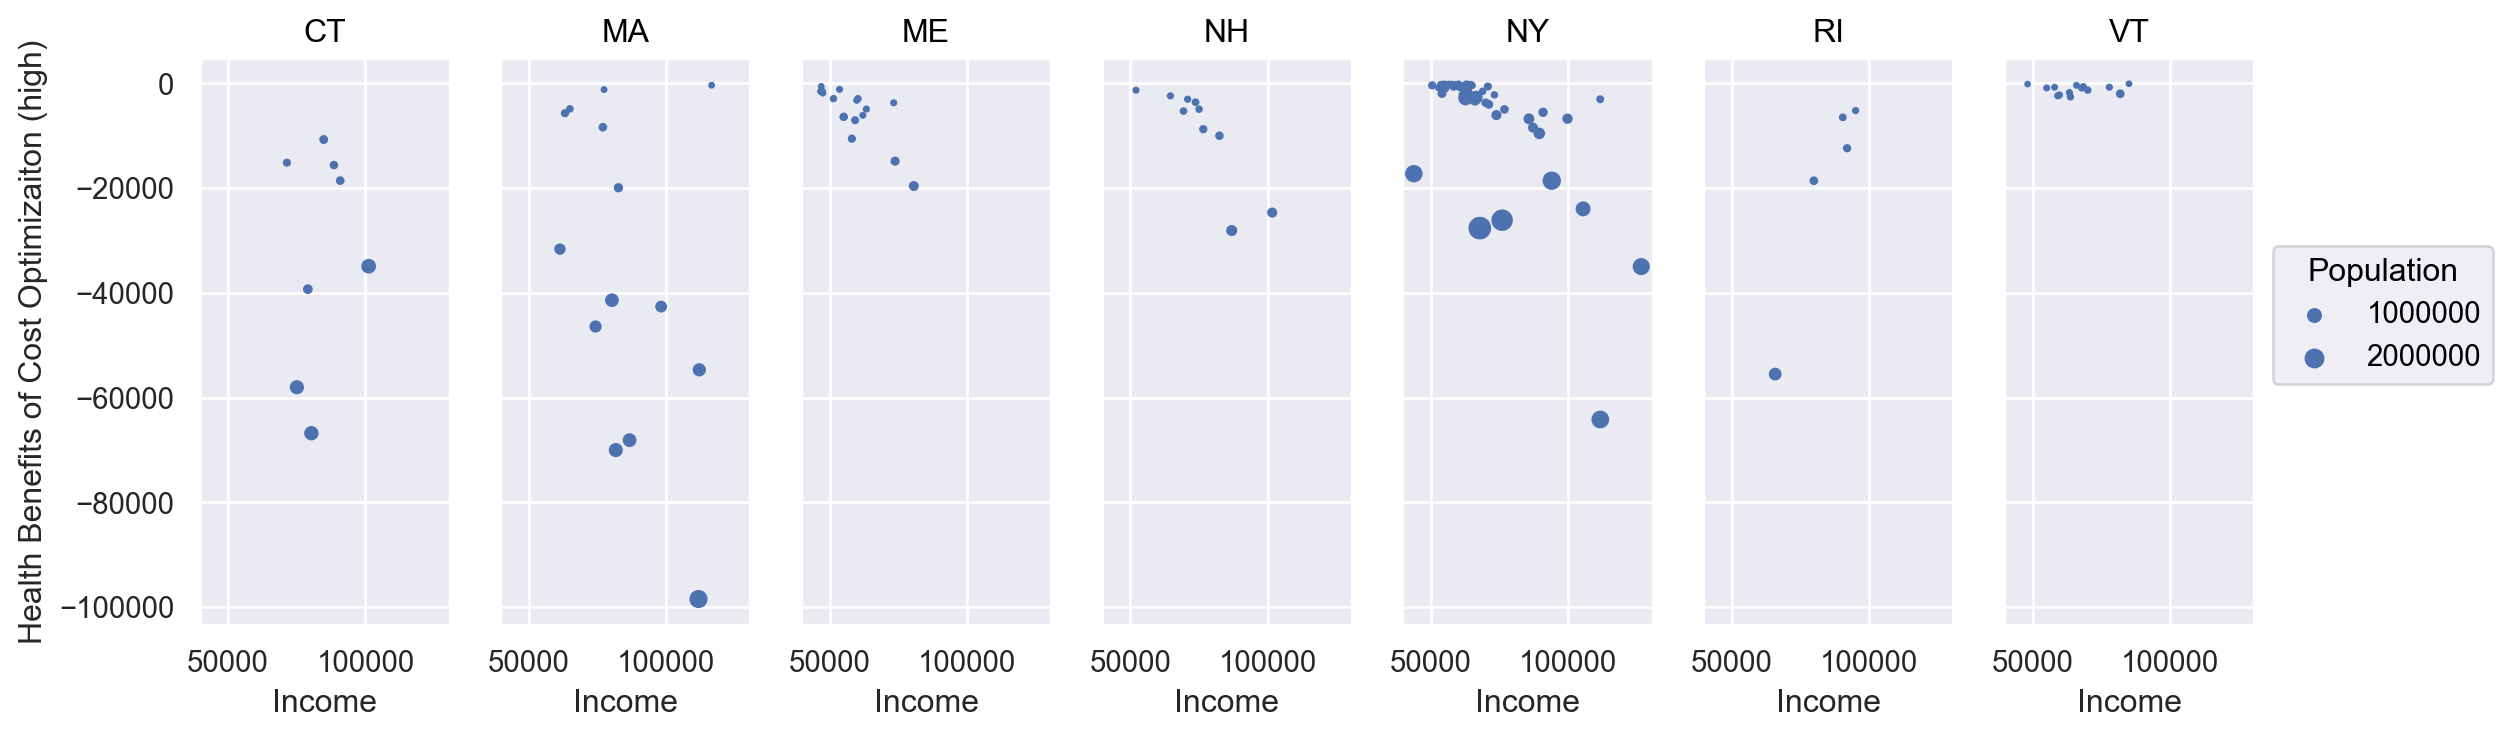

In [45]:

(
    so.Plot(
        inner,
        x='Income',
        y='Health Benefits of Cost Optimizaiton (high)',
        # color='State',
        pointsize='Population')
    .add(so.Dot())
    .facet(col='State')
    .layout(size=(12, 4))
)

## Mix with High Health Cost

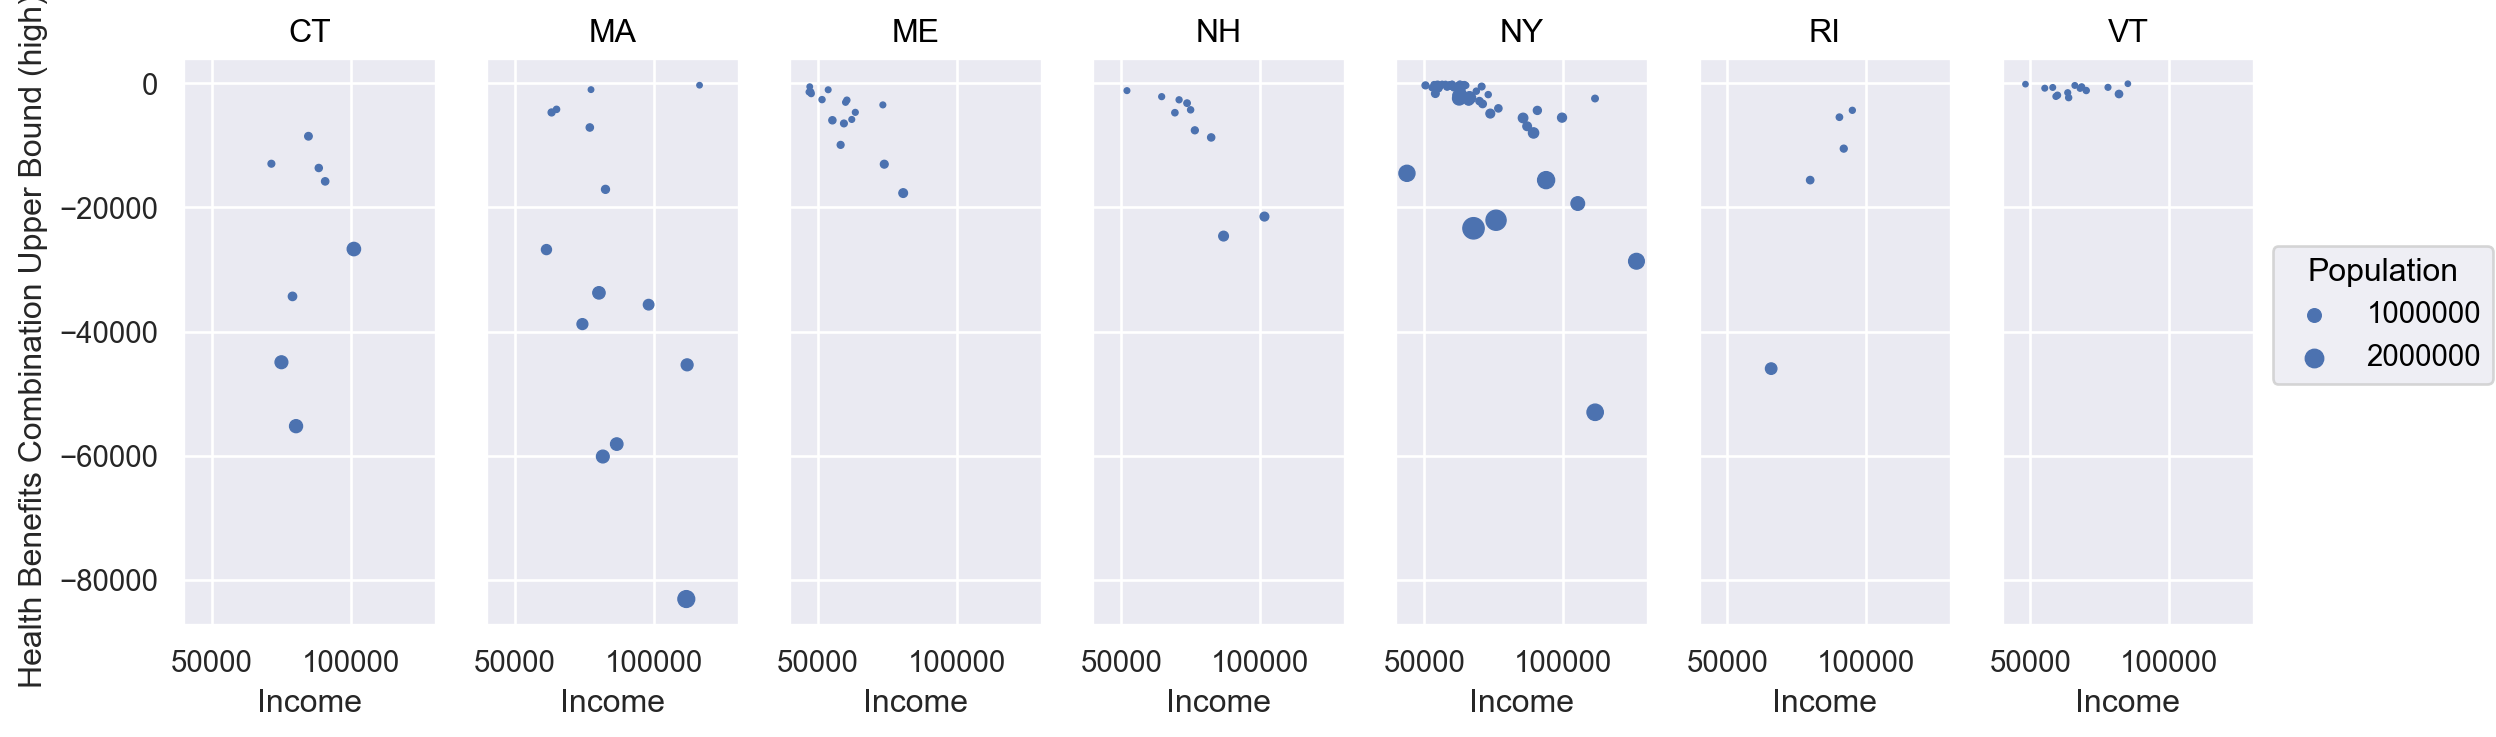

In [46]:
(
    so.Plot(
        inner,
        x='Income',
        y='Health Benefits Combination Upper Bound (high)',
        # color='State',
        pointsize='Population')
    .add(so.Dot())
    .facet(col='State')
    .layout(size=(12, 4))
)

## Health impacts of carbon - health impacts of cost optimiation


In [95]:
inner['Carbon Diff'] = inner['Health Benefits Carbon (high)'] - inner['Health Benefits of Cost Optimizaiton (high)']
inner['Health Diff'] = inner['Health Benefits High Estimate (high)'] - inner['Health Benefits of Cost Optimizaiton (high)']
inner['Mix Diff'] = inner['Health Benefits Combination Upper Bound (high)'] - inner['Health Benefits of Cost Optimizaiton (high)']
# print(carbon_diff.head())

inner

# inner = inner.join([carbon_diff], how='inner').reset_index()

# print(inner.head())


Health Benefits High Estimate (high)  \
State County                                             
CT    Fairfield                          -26704.405666   
      Hartford                           -55237.611419   
      Litchfield                          -8534.112687   
      Middlesex                          -15803.044555   
      New Haven                          -44940.203988   
...                                                ...   
VT    Orleans                              -675.457598   
      Rutland                             -1928.857252   
      Washington                          -1168.251559   
      Windham                             -2113.699356   
      Windsor                             -2315.152327   

                  Health Benefits High Estimate (low)  Population  Income  \
State County                                                                
CT    Fairfield                         -19237.634028      956446  101194   
      Hartford                          -41210.822892      898636   80320   
      Litchfield                         -6165.341489      185175   84797   
      Middlesex                         -12183.068227      164568   90833   
      New Haven                         -33096.672098      864751   75043   
...                                               ...         ...     ...   
VT    Orleans                             -481.790983       27317   58037   
      Rutland                            -1428.885318       60662   59751   
      Washington                          -832.499510       59609   70128   
      Windham                            -1582.123477       45811   59195   
      Windsor                            -1731.414857       57593   63787   

                  Health Benefits Carbon (high)  Health Benefits Carbon (low)  \
State County                                                                    
CT    Fairfield                   -27265.444566                 -19590.890075   
      Hartford                    -56321.305752                 -41887.609106   
      Litchfield                   -8745.163181                  -6298.324355   
      Middlesex                   -16016.295805                 -12317.542919   
      New Haven                   -45747.997296                 -33604.565591   
...                                         ...                           ...   
VT    Orleans                       -717.096782                   -508.501357   
      Rutland                      -2046.346101                  -1504.175459   
      Washington                   -1240.515083                   -877.886914   
      Windham                      -2205.917158                  -1637.676295   
      Windsor                      -2462.438398                  -1826.042340   

                  Health Benefits Low Estimate (high)  \
State County                                            
CT    Fairfield                         -26704.405666   
      Hartford                          -55237.611419   
      Litchfield                         -8534.112687   
      Middlesex                         -15803.044555   
      New Haven                         -44940.203988   
...                                               ...   
VT    Orleans                             -675.457598   
      Rutland                            -1928.857252   
      Washington                         -1168.251559   
      Windham                            -2113.699356   
      Windsor                            -2315.152327   

                  Health Benefits Low Estimate (low)  \
State County                                           
CT    Fairfield                        -19237.634028   
      Hartford                         -41210.822892   
      Litchfield                        -6165.341489   
      Middlesex                        -12183.068227   
      New Haven                        -33096.672098   
...                                              ...   
VT    Orleans    

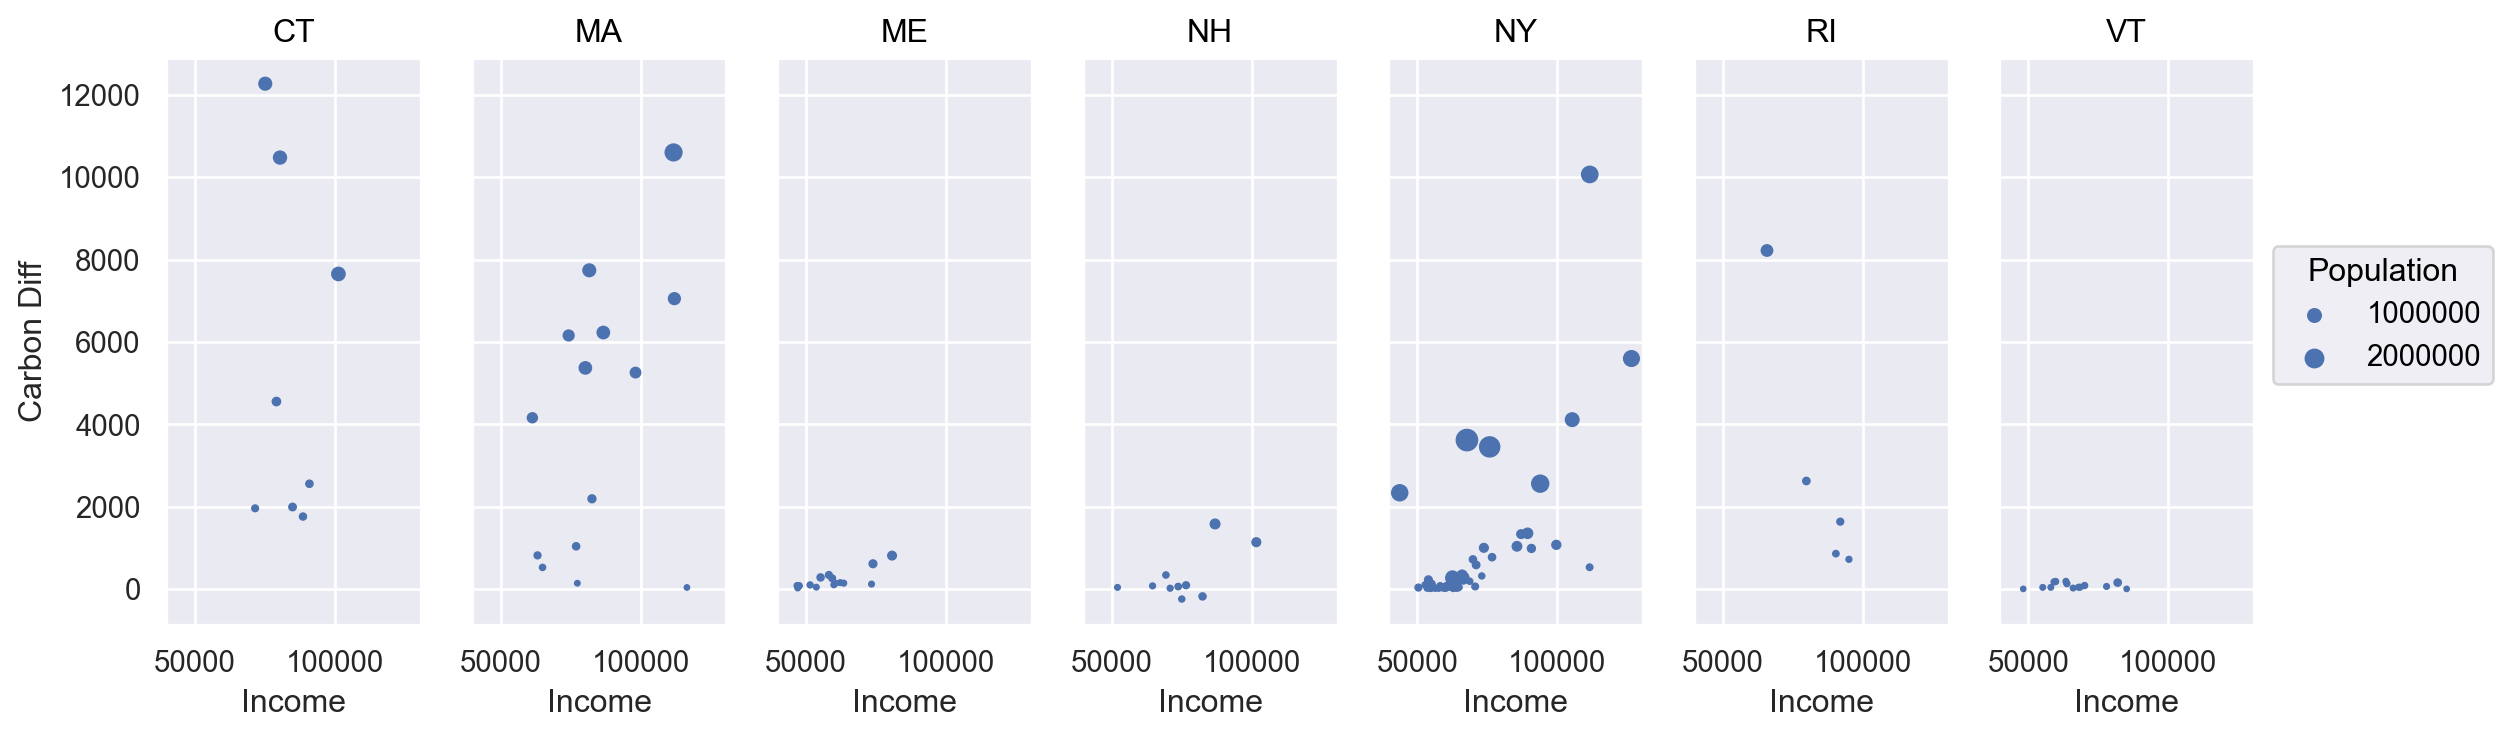

In [59]:
(
    so.Plot(
        inner,
        x='Income',
        y='Carbon Diff',
        # color='State',
        pointsize='Population')
    .add(so.Dot())
    .facet(col='State')
    .layout(size=(12, 4))
)

## Health - Original Cost Difference

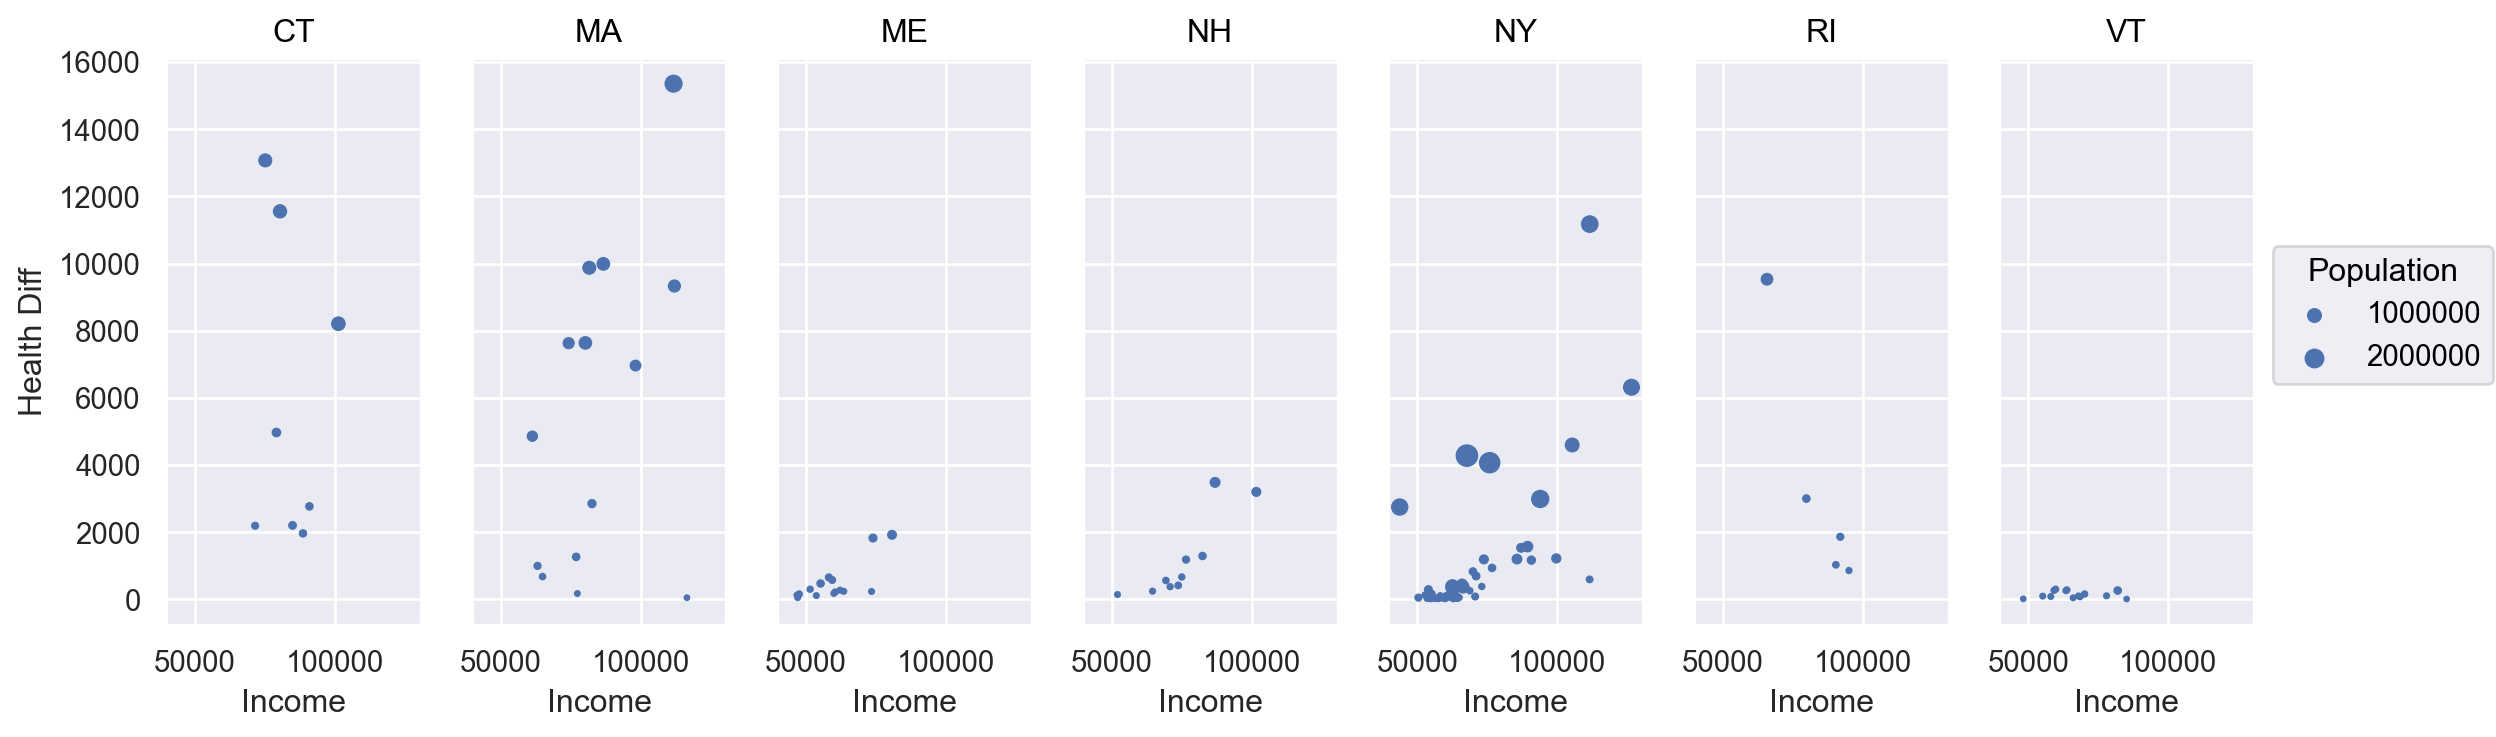

In [60]:
(
    so.Plot(
        inner,
        x='Income',
        y='Health Diff',
        # color='State',
        pointsize='Population')
    .add(so.Dot())
    .facet(col='State')
    .layout(size=(12, 4))
)

## mix optimization

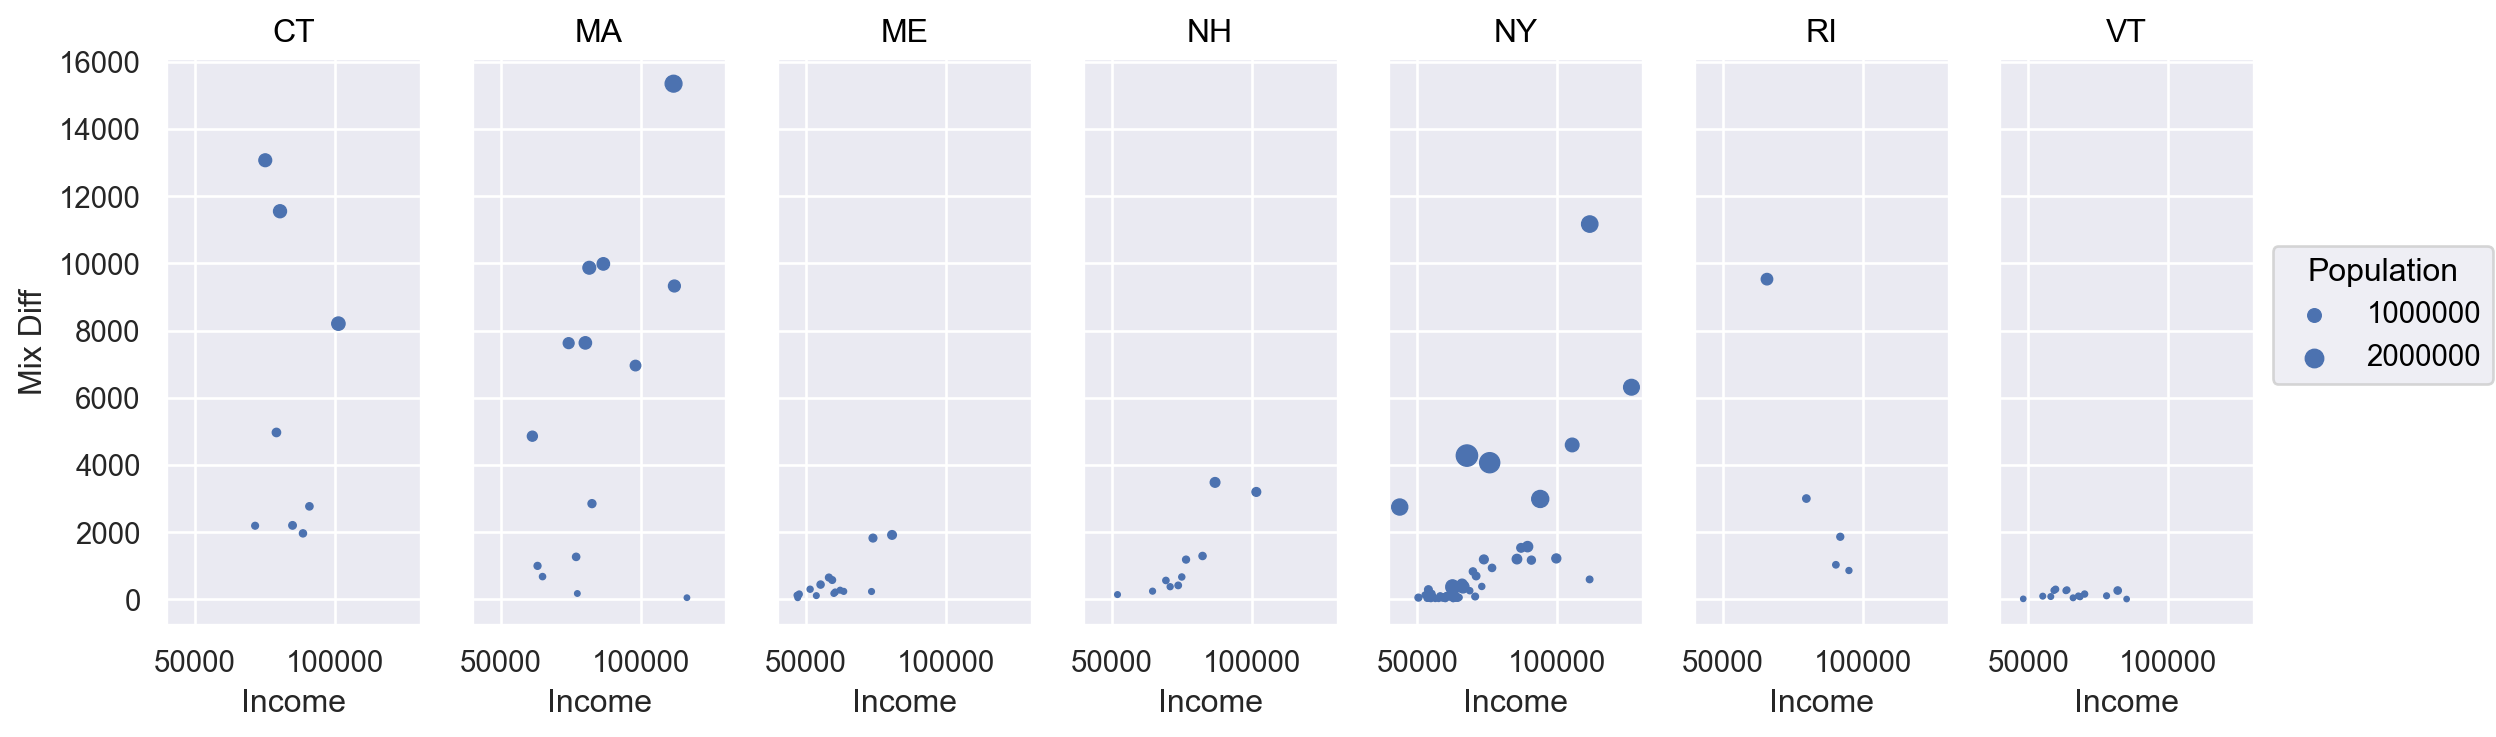

In [61]:
(
    so.Plot(
        inner,
        x='Income',
        y='Mix Diff',
        # color='State',
        pointsize='Population')
    .add(so.Dot())
    .facet(col='State')
    .layout(size=(12, 4))
)

In [66]:
inner[inner['Carbon Diff'] <0]



,State,County,Health Benefits High Estimate (high),Health Benefits High Estimate (low),Population,Income,Health Benefits Carbon (high),Health Benefits Carbon (low),Health Benefits Low Estimate (high),Health Benefits Low Estimate (low),Health Benefits Combination Upper Bound (high),Health Benefits Combination Upper Bound (low),Health Benefits Combination Lower Bound (high),Health Benefits Combination Lower Bound (low),Health Benefits of Cost Optimizaiton (high),Health Benefits of Cost Optimization (low),Carbon Diff,Health Diff,Mix Diff
38,NH,Belknap,-4278.345740,-3061.354467,63395,75035,-5186.166603,-3658.412287,-4278.345740,-3061.354467,-4278.957884,-3061.823033,-4279.014314,-3061.865718,-4946.950287,-3576.943794,-239.216316,668.604548,667.992403
44,NH,Merrimack,-8724.388707,-6294.490225,152983,82457,-10193.816277,-7240.069441,-8724.388707,-6294.490225,-8725.446505,-6295.296295,-8725.544368,-6295.370154,-10018.359681,-7273.075135,-175.456596,1293.970974,1292.913176


In [89]:
state_abbrv_to_FIPS = {
    "CT": "09",
    "ME": "23",
    "MA": "25",
    "NH": "33",
    "RI": "44",
    "VT": "50",
    "NY": "36"
}
FIPS_to_state_abbrv = {v: k for k, v in state_abbrv_to_FIPS.items()}


counties_shp = gpd.read_file(os.path.join(dataprocessing_dir,"tl_2021_us_county/tl_2021_us_county.shp"))

counties_shp['State'] = counties_shp['STATEFP'].map(lambda x: FIPS_to_state_abbrv.get(x, None))
counties_shp['County'] = counties_shp['NAME']
counties_shp = counties_shp[['State', 'County', 'geometry']].dropna().set_index(['State', 'County']).sort_index()

In [80]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(counties_shp)

In [90]:
outer = inner.join([counties_shp],how="outer")
outer[outer.isna().any(axis=1)]

,,Health Benefits High Estimate (high),Health Benefits High Estimate (low),Population,Income,Health Benefits Carbon (high),Health Benefits Carbon (low),Health Benefits Low Estimate (high),Health Benefits Low Estimate (low),Health Benefits Combination Upper Bound (high),Health Benefits Combination Upper Bound (low),Health Benefits Combination Lower Bound (high),Health Benefits Combination Lower Bound (low),Health Benefits of Cost Optimizaiton (high),Health Benefits of Cost Optimization (low),geometry
State,County,,,,,,,,,,,,,,,


In [96]:
inner = counties_shp.join([inner],how="inner")
inner

geometry  \
State County                                                          
CT    Fairfield   POLYGON ((-73.45646 40.98384, -73.46438 40.982...   
      Hartford    POLYGON ((-72.7139 41.6277, -72.71416 41.62734...   
      Litchfield  POLYGON ((-73.25226 41.51213, -73.25266 41.512...   
      Middlesex   POLYGON ((-72.54423 41.6427, -72.54316 41.6428...   
      New Haven   POLYGON ((-72.94635 41.5568, -72.94627 41.5568...   
...                                                             ...   
VT    Orleans     POLYGON ((-72.20249 44.6241, -72.20252 44.6240...   
      Rutland     POLYGON ((-73.01709 43.80486, -73.01707 43.804...   
      Washington  POLYGON ((-72.55971 44.16291, -72.55985 44.162...   
      Windham     POLYGON ((-72.43801 43.125, -72.4378 43.12486,...   
      Windsor     POLYGON ((-72.54914 43.2359, -72.54923 43.2358...   

                  Health Benefits High Estimate (high)  \
State County                                             
CT    Fairfield                          -26704.405666   
      Hartford                           -55237.611419   
      Litchfield                          -8534.112687   
      Middlesex                          -15803.044555   
      New Haven                          -44940.203988   
...                                                ...   
VT    Orleans                              -675.457598   
      Rutland                             -1928.857252   
      Washington                          -1168.251559   
      Windham                             -2113.699356   
      Windsor                             -2315.152327   

                  Health Benefits High Estimate (low)  Population  Income  \
State County                                                                
CT    Fairfield                         -19237.634028      956446  101194   
      Hartford                          -41210.822892      898636   80320   
      Litchfield                         -6165.341489      185175   84797   
      Middlesex                         -12183.068227      164568   90833   
      New Haven                         -33096.672098      864751   75043   
...                                               ...         ...     ...   
VT    Orleans                             -481.790983       27317   58037   
      Rutland                            -1428.885318       60662   59751   
      Washington                          -832.499510       59609   70128   
      Windham                            -1582.123477       45811   59195   
      Windsor                            -1731.414857       57593   63787   

                  Health Benefits Carbon (high)  Health Benefits Carbon (low)  \
State County                                                                    
CT    Fairfield                   -27265.444566                 -19590.890075   
      Hartford                    -56321.305752                 -41887.609106   
      Litchfield                   -8745.163181                  -6298.324355   
      Middlesex                   -16016.295805                 -12317.542919   
      New Haven                   -45747.997296                 -33604.565591   
...                                         ...                           ...   
VT    Orleans                       -717.096782                   -508.501357   
      Rutland                      -2046.346101                  -1504.175459   
      Washington                   -1240.515083                   -877.886914   
      Windham                      -2205.917158                  -1637.676295   
      Windsor                      -2462.438398                  -1826.042340   

                  Health Benefits Low Estimate (high)  \
State County                                            
CT    Fairfield                         -26704.405666   
      Hartford                          -55237.611419   
      Litchfield                         -8534.112687   
      Middlesex                        

<Axes: >

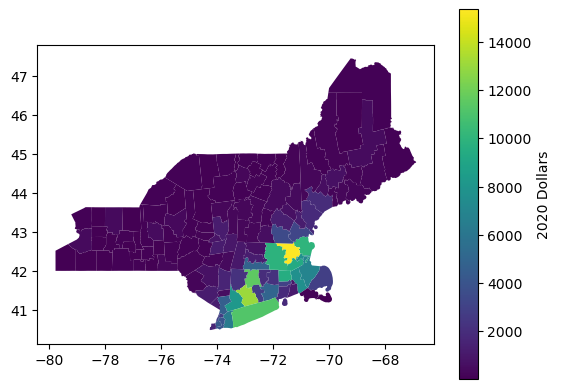

In [100]:
inner.plot(column="Mix Diff", legend=True, legend_kwds={"label": "2020 Dollars"})

<Axes: >

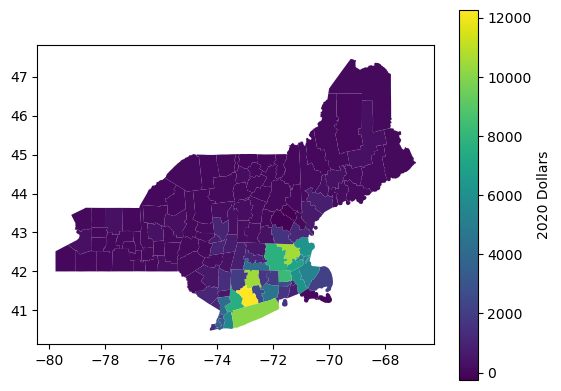

In [101]:
inner.plot(column="Carbon Diff", legend=True, legend_kwds={"label": "2020 Dollars"})

In [ ]:
inner.plot(column="Mix Diff", legend=True, legend_kwds={"label": "2020 Dollars"})